<a href="https://colab.research.google.com/github/XiuZheng2001/img/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
 
from torch.utils.data import  DataLoader
from torchvision import models
 
import torchvision.transforms as transforms
import torchvision.datasets as dataset

In [3]:
modelVGG=models.vgg16(pretrained=True)
!wget https://raw.githubusercontent.com/XiuZheng2001/img/main/dog1.jpg

--2021-10-06 09:17:39--  https://raw.githubusercontent.com/XiuZheng2001/img/main/dog1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91819 (90K) [image/jpeg]
Saving to: ‘dog1.jpg’

dog1.jpg            100%[===================>]  89.67K  --.-KB/s    in 0.009s  

2021-10-06 09:17:39 (9.23 MB/s) - ‘dog1.jpg’ saved [91819/91819]



uint8


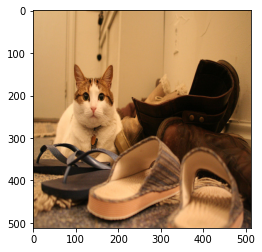

In [4]:
cat=cv.resize(cv.imread('./dog1.jpg'),(512,512),interpolation=cv.INTER_AREA)
img = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
plt.imshow(img)
print(img.dtype)

In [5]:
transform=transforms.Compose([
                               transforms.ToPILImage(),
                               transforms.RandomCrop(512),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485,0.456,0.406],[0.229, 0.224, 0.225])
])
#先transform，再unsqueeze为torch模型可以接受的尺寸
img=np.array(img)
img=transform(img)
img=img.unsqueeze(0)
print(img.size())

torch.Size([1, 3, 512, 512])


In [7]:
num_of_layers=0
conv_layers=[]

for layer in modelVGG.modules():
    if isinstance(layer, nn.Conv2d):
        num_of_layers += 1
        conv_layers.append(layer)
    elif isinstance(layer, nn.Sequential):
        for l in layer.modules():
            if isinstance(layer, nn.Conv2d):
                num_of_layers += 1
                conv_layers.append(layer)

print(num_of_layers)

13


Layer  1


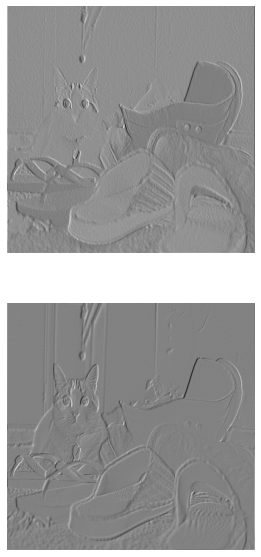

Layer  2


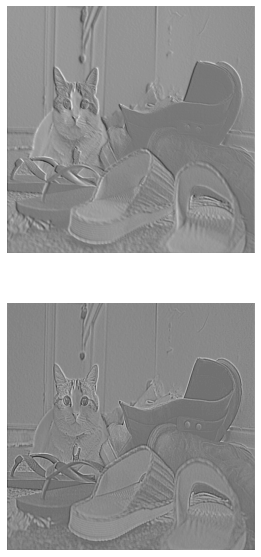

Layer  3


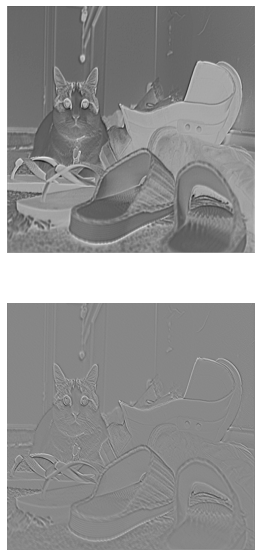

Layer  4


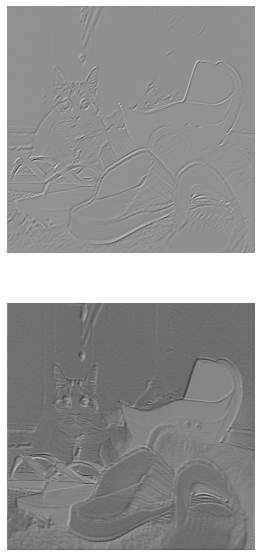

Layer  5


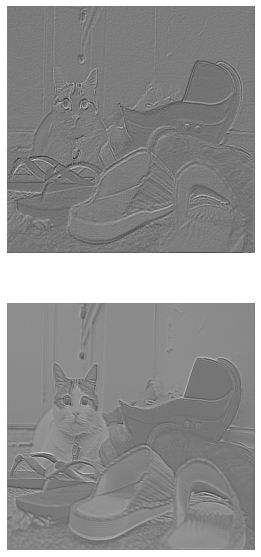

Layer  6


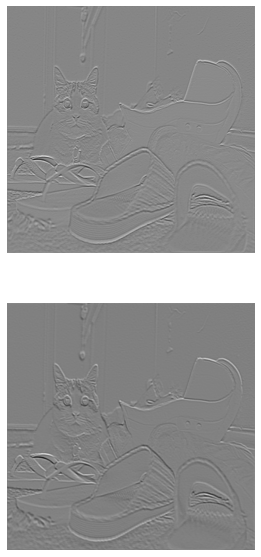

Layer  7


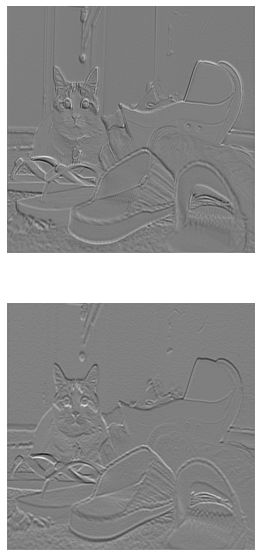

Layer  8


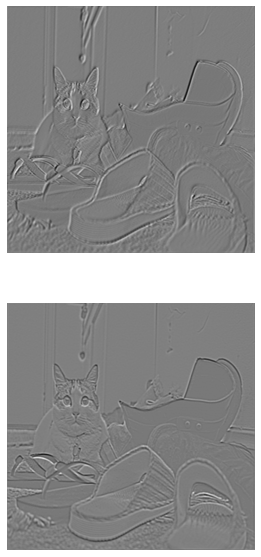

Layer  9


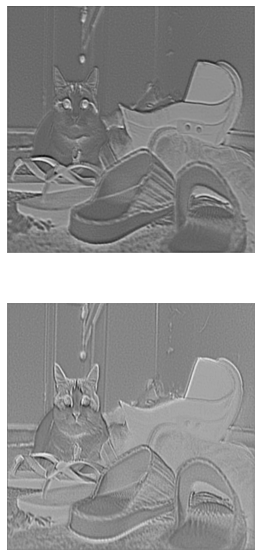

Layer  10


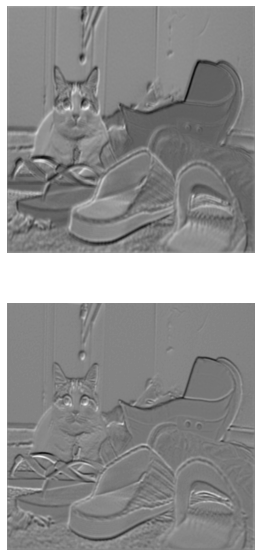

Layer  11


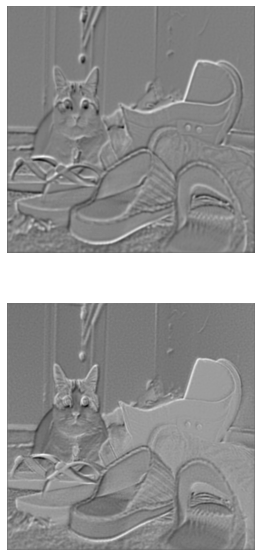

Layer  12


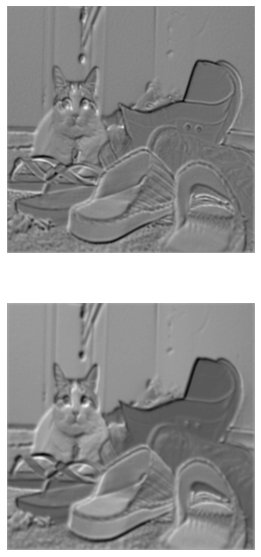

Layer  13


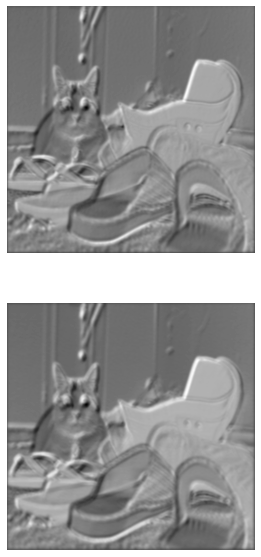

In [8]:
results=[conv_layers[0](img)]
# 求解所有conv layer的输出：
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1])) # 每一次的输入为results[-1]，即上一层的输出。
outputs = results

for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print("Layer ",num_layer+1)
    for i, filter in enumerate(layer_viz):
        if i == 2:    #每个layer绘制i张输出
            break
        plt.subplot(2, 1, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    plt.show()
    plt.close()